# National UFO Reporting Center Data Analysis

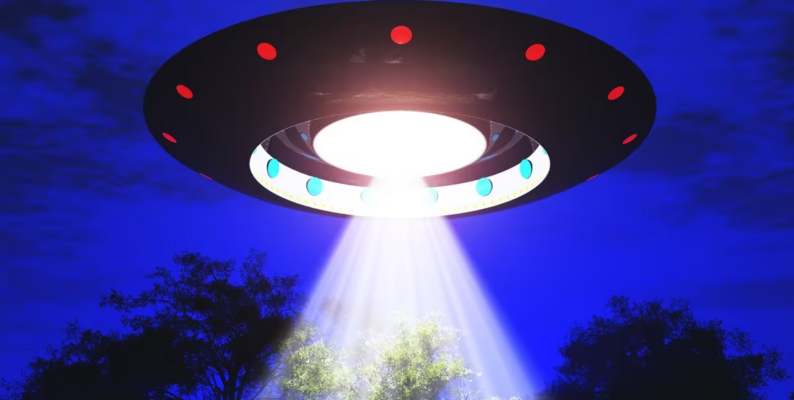


## Overview

This project analyzes UFO sighting data collected by the National UFO Reporting Center (NUFORC), which has recorded over 80,000 reports from 1949 to 2013. By conducting a descriptive analysis of sighting locations, timings, and characteristics, we aim to uncover patterns and trends in UFO sightings. Our analysis explores key questions such as the most commonly reported UFO shapes, the times and places where sightings are most frequent, and whether any correlations exist between the time of sighting and the likelihood of a UFO encounter.

## Business Problem


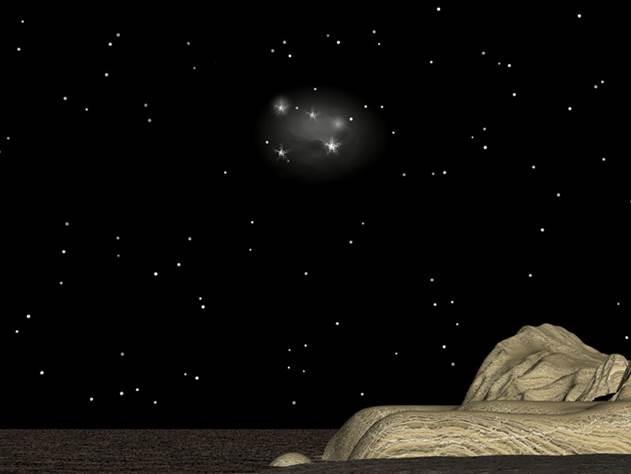
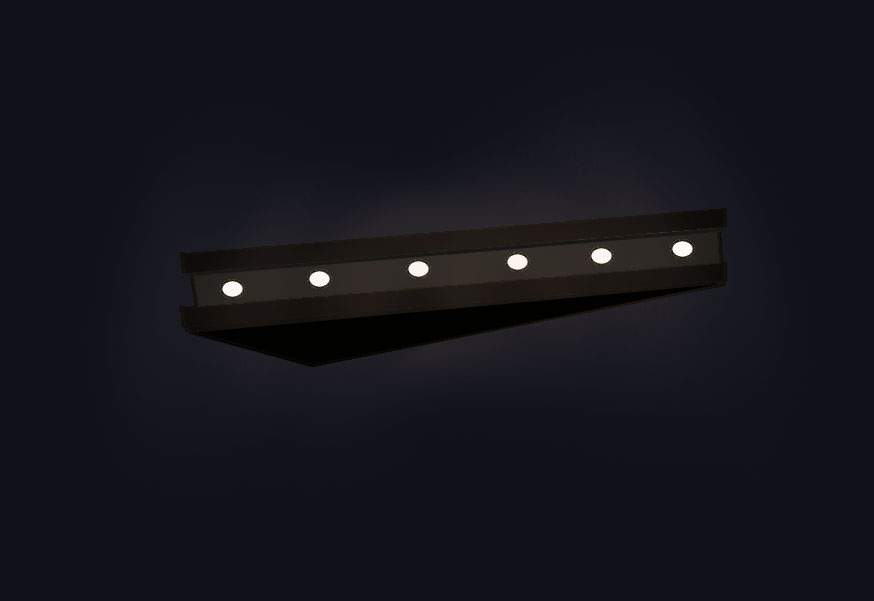



By identifying patterns in UFO sightings, the National UFO Reporting Center can enhance its ability to communicate findings to researchers, enthusiasts, and governmental entities. Providing clear, data-driven visualizations of UFO sighting frequencies, shapes, and encounter characteristics will improve the understanding of these phenomena for tourist, government, or aerospace agencies. This, in turn, will support strategic decisions related to future research, public education, and potential resource allocation for investigating UFO encounters.

## Data Understanding

The dataset contains detailed information on UFO sightings reported globally. It includes key features like the date and time of the sighting, geographic information (country, region, and locale), descriptions of the UFO (shape and encounter duration), and other attributes that can be used for exploratory data analysis and predictive modeling.
Given the diverse nature of this dataset, we will focus on cleaning and processing the data to answer three key business questions:

1. What regions and times have the highest frequency of UFO sightings?
     - We will use the Country, Region, Locale, Year, Month, Hour, and Season columns to find the hotspots for UFO activity.
2. Are there notable patterns in UFO shapes, descriptions, or lengths of encounters?
     - The columns UFO_shape, length_of_encounter_seconds, and Description will be analyzed to explore common shapes, durations, and narratives in the reported encounters.
3. Can any correlations be drawn between the timing (season, time of day) and the likelihood of a sighting? (Is there a potential for identifying anomalies or "false positives" in the sighting reports?)
     - We will explore correlations between the Season, Month, Hour, and length_of_encounter_seconds to see if UFO sightings show patterns based on the time of day or season of the year.

In [1]:
#Import and load the data with pandas 

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

%matplotlib inline

In [2]:
ufo_df = pd.read_csv("data/ufo_data/ufo-sightings-transformed.csv", index_col=0)

In [3]:
ufo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80328 entries, 0 to 80327
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date_time                    80328 non-null  object 
 1   date_documented              80328 non-null  object 
 2   Year                         80328 non-null  int64  
 3   Month                        80328 non-null  int64  
 4   Hour                         80328 non-null  int64  
 5   Season                       80328 non-null  object 
 6   Country_Code                 80069 non-null  object 
 7   Country                      80069 non-null  object 
 8   Region                       79762 non-null  object 
 9   Locale                       79871 non-null  object 
 10  latitude                     80328 non-null  float64
 11  longitude                    80328 non-null  float64
 12  UFO_shape                    78398 non-null  object 
 13  length_of_encounter_s

### UFO Data

The UFO sighting datset includes over 80,000 records of UFO sightings from October 1949 to September 2013, and captures a wide variety of sighting locations, times, and characteristics, such as UFO shapes and encounter durations.

In [4]:
ufo_df.head()

,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
0,1949-10-10 20:30:00,4/27/2004,1949,10,20,Autumn,USA,United States,Texas,San Marcos,29.883056,-97.941111,Cylinder,2700.0,45 minutes,This event took place in early fall around 194...
1,1949-10-10 21:00:00,12/16/2005,1949,10,21,Autumn,USA,United States,Texas,Bexar County,29.384210,-98.581082,Light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...
2,1955-10-10 17:00:00,1/21/2008,1955,10,17,Autumn,GBR,United Kingdom,England,Chester,53.200000,-2.916667,Circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...
3,1956-10-10 21:00:00,1/17/2004,1956,10,21,Autumn,USA,United States,Texas,Edna,28.978333,-96.645833,Circle,20.0,1/2 hour,My older brother and twin sister were leaving ...
4,1960-10-10 20:00:00,1/22/2004,1960,10,20,Autumn,USA,United States,Hawaii,Kaneohe,21.418056,-157.803611,Light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...


In [5]:
ufo_df['Sighting Date'] = pd.to_datetime(ufo_df['Date_time'])
ufo_df['Sighting Date'].describe()


count                            80328
mean     2004-05-17 07:19:24.235882880
min                1906-11-11 00:00:00
25%                2001-08-02 22:25:00
50%                2006-11-22 05:57:00
75%                2011-06-21 03:30:00
max                2014-05-08 18:45:00
Name: Sighting Date, dtype: object

In [6]:
ufo_df['Locale'].describe()


count           79871
unique          13245
top       Los Angeles
freq              827
Name: Locale, dtype: object

In [7]:
ufo_df['UFO_shape'].describe()


count     78398
unique       29
top       Light
freq      16565
Name: UFO_shape, dtype: object

In [8]:
ufo_df['length_of_encounter_seconds'].describe()

count    8.032800e+04
mean     9.017336e+03
std      6.202322e+05
min      1.000000e-03
25%      3.000000e+01
50%      1.800000e+02
75%      6.000000e+02
max      9.783600e+07
Name: length_of_encounter_seconds, dtype: float64

In [9]:
ufo_df['Hour'].describe()

count    80328.000000
mean        15.525172
std          7.753750
min          0.000000
25%         10.000000
50%         19.000000
75%         21.000000
max         23.000000
Name: Hour, dtype: float64

## Data Cleaning

In [10]:
#Check for missing values
print(ufo_df.isnull().sum())

Date_time                         0
date_documented                   0
Year                              0
Month                             0
Hour                              0
Season                            0
Country_Code                    259
Country                         259
Region                          566
Locale                          457
latitude                          0
longitude                         0
UFO_shape                      1930
length_of_encounter_seconds       0
Encounter_Duration                0
Description                      15
Sighting Date                     0
dtype: int64


**Handling Missing Data**

After reading and getting a general overview of our data, we can see missing values in the country code, country, region, locale, UFO shape, and description columns to clean.

In [11]:
#Decide to just drop the rows with missing values in the Country column
# Drop rows with missing values in 'Country_Code', 'Country', 'Region', 'Locale', and 'UFO_shape'
ufo_df.dropna(subset=['Country_Code', 'Country', 'Region', 'Locale'], inplace=True)
print(ufo_df)

                 Date_time date_documented  Year  Month  Hour  Season  \
0      1949-10-10 20:30:00       4/27/2004  1949     10    20  Autumn   
1      1949-10-10 21:00:00      12/16/2005  1949     10    21  Autumn   
2      1955-10-10 17:00:00       1/21/2008  1955     10    17  Autumn   
3      1956-10-10 21:00:00       1/17/2004  1956     10    21  Autumn   
4      1960-10-10 20:00:00       1/22/2004  1960     10    20  Autumn   
...                    ...             ...   ...    ...   ...     ...   
80323  2013-09-09 21:15:00       9/30/2013  2013      9    21  Autumn   
80324  2013-09-09 22:00:00       9/30/2013  2013      9    22  Autumn   
80325  2013-09-09 22:00:00       9/30/2013  2013      9    22  Autumn   
80326  2013-09-09 22:20:00       9/30/2013  2013      9    22  Autumn   
80327  2013-09-09 23:00:00       9/30/2013  2013      9    23  Autumn   

      Country_Code         Country      Region        Locale   latitude  \
0              USA   United States       Texas  


At first, we tried using the geopandas, geopy, and geocoder to convert latitude and longitude coordinates to countries. 
However, this did not work, resulting in a updated CSV file with missing values, so we decided to drop the rows with missing values in the country_code, country, region, and locale column
because we realized that most of our data might have taken place over international water

For the UFO shape, since there is already an unknown column we are going to fill in our missing values with unknown. We will also fill in the missing descriptions with a placeholder. 

In [12]:
#fill missing UFO shapes with a placeholder
ufo_df['UFO_shape'].fillna('Unknown', inplace=True)

# fill descriptions with a placeholder or leave them as is
ufo_df['Description'].fillna('No description provided', inplace=True)

/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_73318/1437221188.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ufo_df['UFO_shape'].fillna('Unknown', inplace=True)
/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_73318/1437221188.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [13]:
# Verify changes to ensure rows with missing values in the specified columns are dropped
print(ufo_df[['Country_Code', 'Country', 'Region', 'Locale', 'UFO_shape']].isnull().sum())

Country_Code    0
Country         0
Region          0
Locale          0
UFO_shape       0
dtype: int64


**Additional Standarizations**

Since the date time, encouter duration, date documentated, year, month, hour, column time units vary we are going to convert these columns into a consistent format for analysis using the pd.to_datetime() and numeric().

As an example lets take a look at a few sample values in the Encounter Duration column

In [14]:
# Display unique values to understand various formats in 'Encounter_Duration'
ufo_df['Encounter_Duration'].unique()[:20]  # Display first 20 unique values to analyze different formats

array(['45 minutes', '1-2 hrs', '20 seconds', '1/2 hour', '15 minutes',
       '5 minutes', 'about 3 mins', '20 minutes', '3  minutes',
       'several minutes', '5 min.', '3 minutes', '30 min.', '30 seconds',
       '20minutes', '2 minutes', '20-30 min', '20 sec.', 'one hour?',
       '5-6 minutes'], dtype=object)

**Time Standardization**

As we can see the units have already been unified in the length of encounter in seconds column 

In [15]:
#Standardize Dates and Times
#Convert Date_time to datetime format
ufo_df['Date_time'] = pd.to_datetime(ufo_df['Date_time'], errors='coerce')
ufo_df.head()

,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description,Sighting Date
0,1949-10-10 20:30:00,4/27/2004,1949,10,20,Autumn,USA,United States,Texas,San Marcos,29.883056,-97.941111,Cylinder,2700.0,45 minutes,This event took place in early fall around 194...,1949-10-10 20:30:00
1,1949-10-10 21:00:00,12/16/2005,1949,10,21,Autumn,USA,United States,Texas,Bexar County,29.384210,-98.581082,Light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,1949-10-10 21:00:00
2,1955-10-10 17:00:00,1/21/2008,1955,10,17,Autumn,GBR,United Kingdom,England,Chester,53.200000,-2.916667,Circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1955-10-10 17:00:00
3,1956-10-10 21:00:00,1/17/2004,1956,10,21,Autumn,USA,United States,Texas,Edna,28.978333,-96.645833,Circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1956-10-10 21:00:00
4,1960-10-10 20:00:00,1/22/2004,1960,10,20,Autumn,USA,United States,Hawaii,Kaneohe,21.418056,-157.803611,Light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1960-10-10 20:00:00


In [16]:
#Standardize the date_documented column
ufo_df['date_documented'] = pd.to_datetime(ufo_df['date_documented'], errors='coerce')
ufo_df.head()

,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description,Sighting Date
0,1949-10-10 20:30:00,2004-04-27,1949,10,20,Autumn,USA,United States,Texas,San Marcos,29.883056,-97.941111,Cylinder,2700.0,45 minutes,This event took place in early fall around 194...,1949-10-10 20:30:00
1,1949-10-10 21:00:00,2005-12-16,1949,10,21,Autumn,USA,United States,Texas,Bexar County,29.384210,-98.581082,Light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,1949-10-10 21:00:00
2,1955-10-10 17:00:00,2008-01-21,1955,10,17,Autumn,GBR,United Kingdom,England,Chester,53.200000,-2.916667,Circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1955-10-10 17:00:00
3,1956-10-10 21:00:00,2004-01-17,1956,10,21,Autumn,USA,United States,Texas,Edna,28.978333,-96.645833,Circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1956-10-10 21:00:00
4,1960-10-10 20:00:00,2004-01-22,1960,10,20,Autumn,USA,United States,Hawaii,Kaneohe,21.418056,-157.803611,Light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1960-10-10 20:00:00


In [17]:
#Standardize Year, Month, Hour and Season Column 
#Year, Month, and Hour : are they derived accurately from Date_time?
#Season: grouping months into seasons
ufo_df['Year'] = ufo_df['Date_time'].dt.year
ufo_df['Month'] = ufo_df['Date_time'].dt.month
ufo_df['Hour'] = ufo_df['Date_time'].dt.hour

#Seasons Standardization
ufo_df['Season'] = ufo_df['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else 'Spring' if x in [3, 4, 5] else 'Summer' if x in [6, 7, 8] else 'Autumn')

ufo_df.head()

,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description,Sighting Date
0,1949-10-10 20:30:00,2004-04-27,1949,10,20,Autumn,USA,United States,Texas,San Marcos,29.883056,-97.941111,Cylinder,2700.0,45 minutes,This event took place in early fall around 194...,1949-10-10 20:30:00
1,1949-10-10 21:00:00,2005-12-16,1949,10,21,Autumn,USA,United States,Texas,Bexar County,29.384210,-98.581082,Light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,1949-10-10 21:00:00
2,1955-10-10 17:00:00,2008-01-21,1955,10,17,Autumn,GBR,United Kingdom,England,Chester,53.200000,-2.916667,Circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1955-10-10 17:00:00
3,1956-10-10 21:00:00,2004-01-17,1956,10,21,Autumn,USA,United States,Texas,Edna,28.978333,-96.645833,Circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1956-10-10 21:00:00
4,1960-10-10 20:00:00,2004-01-22,1960,10,20,Autumn,USA,United States,Hawaii,Kaneohe,21.418056,-157.803611,Light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1960-10-10 20:00:00


In [18]:
#Standardize the length of encounter seconds column
# Convert 'length_of_encounter_seconds' to numeric, forcing errors to NaN
ufo_df['length_of_encounter_seconds'] = pd.to_numeric(ufo_df['length_of_encounter_seconds'], errors='coerce')

# Remove outliers (e.g., encounters longer than a day)
ufo_df = ufo_df[ufo_df['length_of_encounter_seconds'] <= 86400]  # 86400 seconds = 24 hours

# Verify changes
ufo_df['length_of_encounter_seconds'].describe()

count    79413.000000
mean       927.032450
std       3422.613148
min          0.001000
25%         30.000000
50%        180.000000
75%        600.000000
max      86400.000000
Name: length_of_encounter_seconds, dtype: float64

**Handling Geographical Data**

We are going to standardize country codes and names as well to handle any inconsistent entries such as case sensity or misspellings 

In [19]:
#Standardize Country Codes and Names.
#Ensure that the country codes and Country values are consistent.
ufo_df['Country_Code']= ufo_df['Country_Code'].str.upper().str.strip()
ufo_df['Country'] = ufo_df['Country'].str.title().str.strip()

ufo_df['Country_Code'].unique()

array(['USA', 'GBR', 'BMU', 'CAN', 'NZL', 'RUS', 'AUS', 'LTU', 'NOR',
       'ISL', 'MEX', 'AUT', 'VNM', 'BEL', 'CHN', 'GRC', 'FRA', 'CHL',
       'IDN', 'IND', 'THA', 'ESP', 'MYS', 'VEN', 'PAK', 'IRN', 'AFG',
       'MAR', 'DEU', 'ZAF', 'HRV', 'COL', 'ISR', 'EGY', 'PRI', 'POL',
       'SRB', 'IRL', 'PAN', 'PHL', 'CRI', 'HND', 'SWE', 'ITA', 'NLD',
       'DOM', 'ARG', 'CYP', 'BGD', 'JAM', 'SYR', 'KWT', 'ROU', 'UKR',
       'BGR', 'SVK', 'TUN', 'DZA', 'IRQ', 'FIN', 'CS-KM', 'JPN', 'LBN',
       'MDG', 'LKA', 'BIH', 'LVA', 'SUR', 'GTM', 'UZB', 'GHA', 'BRA',
       'NPL', 'BOL', 'PRT', 'QAT', 'JOR', 'SAU', 'TUR', 'MMR', 'DNK',
       'LUX', 'HUN', 'MLT', 'ARE', 'CUB', 'ZWE', 'AZE', 'FJI', 'SLB',
       'EST', 'OMN', 'LSO', 'NGA', 'CHE', 'KEN', 'HTI', 'GUY', 'PER',
       'CZE', 'TTO', 'BLZ', 'ECU', 'SLV', 'KOR', 'NAM', 'ZMB', 'KHM',
       'AGO', 'ETH', 'CMR', 'TLS', 'MKD', 'ALB', 'SEN', 'BWA', 'GAB',
       'URY', 'KAZ', 'MNG', 'LAO', 'LBY'], dtype=object)

In [20]:
# Ensure latitude and longitude are within valid ranges
ufo_df = ufo_df[(ufo_df['latitude'] >= -90) & (ufo_df['latitude'] <= 90)]
ufo_df = ufo_df[(ufo_df['longitude'] >= -180) & (ufo_df['longitude'] <= 180)]

# Verify the changes
ufo_df[['latitude', 'longitude']].describe()

,latitude,longitude
count,79413.000000,79413.000000
mean,38.242312,-87.747623
std,10.080993,37.669803
min,-46.413187,-176.658056
25%,34.149287,-112.166111
50%,39.433611,-87.992268
75%,42.779444,-78.886944
max,72.700000,178.441900


**Grouping UFO Shape Sizes**

In [21]:
# Standardize the UFO shape
# Convert 'UFO_shape' to lowercase for consistency
ufo_df['UFO_shape'] = ufo_df['UFO_shape'].str.lower().str.strip()

# Map similar shapes to a single standardized shape
shape_mapping = {
    'circle': 'circular',
    'light': 'light',
    'cylinder': 'cylinder',
    # Add more mappings as needed
}
ufo_df['UFO_shape'] = ufo_df['UFO_shape'].map(shape_mapping).fillna(ufo_df['UFO_shape'])

# Verify changes
ufo_df['UFO_shape'].unique()

array(['cylinder', 'light', 'circular', 'sphere', 'disk', 'fireball',
       'unknown', 'oval', 'other', 'cigar', 'rectangle', 'chevron',
       'triangle', 'formation', 'delta', 'changing', 'egg', 'diamond',
       'flash', 'teardrop', 'cone', 'cross', 'pyramid', 'round',
       'crescent', 'flare', 'hexagon', 'dome', 'changed'], dtype=object)

## Data Analysis 

The following analysis explores the global patterns of UFO sightings, including geographic, temporal, and descriptive aspects. We aim to answer three key business questions using visualizations and statistical analysis.

### UFO Sightings by Regions and Time

We will use the Country, Region, Year, Month, Hour, and Season columns to determine the hotspots and peak times for UFO activity.

In [22]:
#Frequency of sightings by Country
sightings_by_country = ufo_df['Country'].value_counts().head(10)  # Display top 10 countries for clarity
print(sightings_by_country)


Country
United States     70727
Canada             3546
United Kingdom     2303
Australia           559
India               215
Mexico              209
Germany             116
New Zealand          94
South Africa         94
Netherlands          92
Name: count, dtype: int64


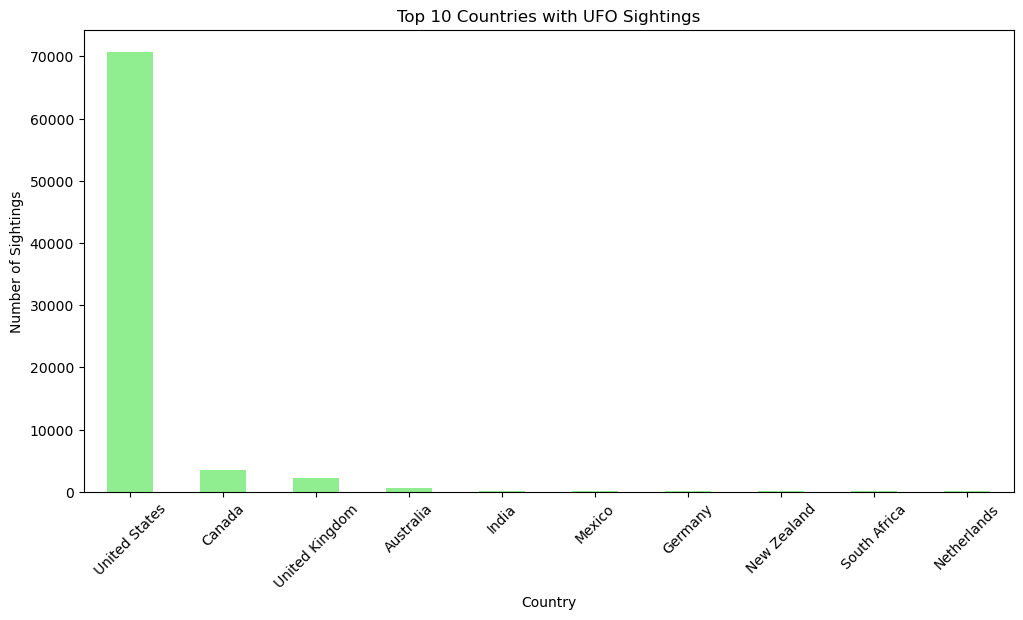

In [23]:

# Plot the frequency of sightings by country
plt.figure(figsize=(12, 6))
sightings_by_country.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Countries with UFO Sightings')
plt.xlabel('Country')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.show()

The United States overwhelmingly leads in UFO sightings, accounting for the vast majority of reports globally, followed by Canada and the United Kingdom. Other countries have significantly fewer sightings, indicating potential reporting or visibility factors.

In [24]:
# Frequency of sightings by region
region_counts = ufo_df['Region'].value_counts().head(10)  # Top 10 regions
print(region_counts)

Region
California      9597
Washington      4263
Florida         4196
Texas           3677
New York        3232
Arizona         2680
Illinois        2647
Pennsylvania    2573
Ohio            2423
Michigan        2052
Name: count, dtype: int64


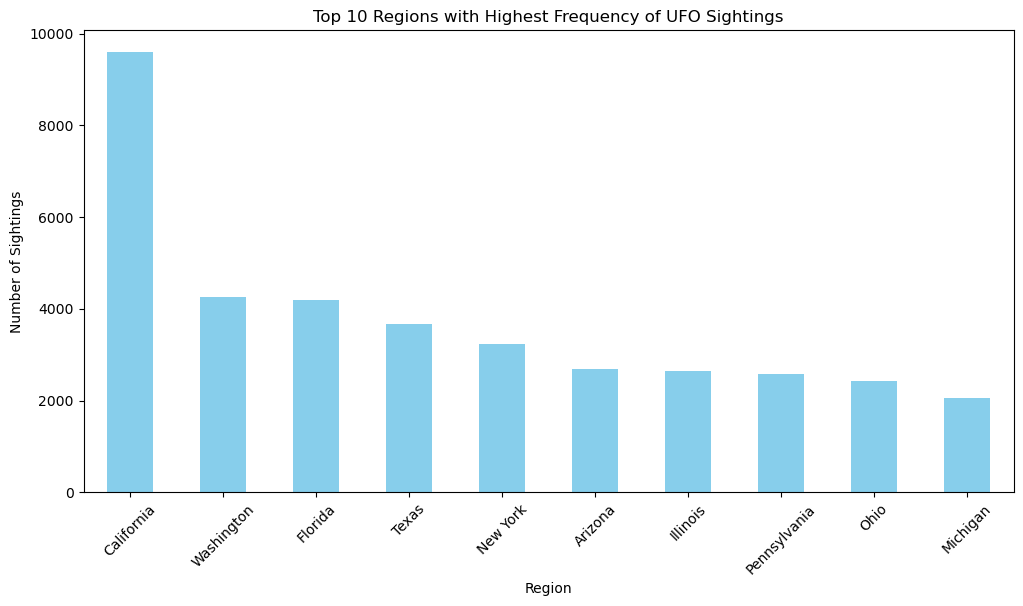

In [25]:
# Plotting the top regions
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
region_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Regions with Highest Frequency of UFO Sightings')
plt.xlabel('Region')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.show()

California has the highest number of UFO sightings among U.S. states, followed by Washington and Florida. These regional hotspots suggest that coastal and densely populated states may be more prone to UFO sightings.

In [26]:
#Frequency of sightings by Year
sightings_by_year = ufo_df['Year'].value_counts().sort_index()
print(sightings_by_year)

Year
1910       2
1916       1
1920       1
1925       1
1929       1
        ... 
2010    4241
2011    5058
2012    7312
2013    6988
2014    2244
Name: count, Length: 86, dtype: int64


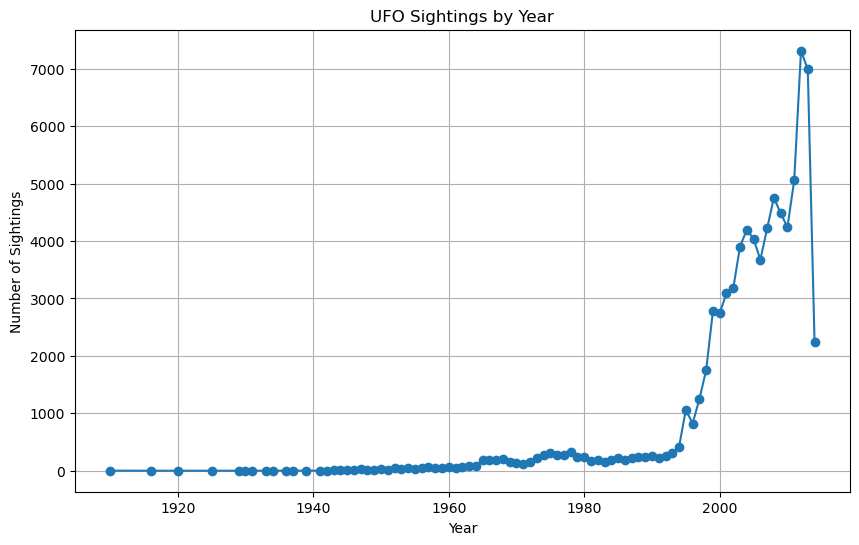

In [27]:


# Plot the frequency of sightings over the years
plt.figure(figsize=(10, 6))
plt.plot(sightings_by_year.index, sightings_by_year.values, marker='o')
plt.title('UFO Sightings by Year')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.grid(True)
plt.show()

There is a notable rise in UFO sightings starting from 2010, peaking in 2012, which could be linked to increased public awareness or changes in reporting mechanisms. The decline after 2014 may suggest a stabilization or decrease in interest.

In [28]:
# Frequency of sightings by time (Month)
monthly_counts = ufo_df['Month'].value_counts().sort_index()
print(monthly_counts)

Month
1     5578
2     4564
3     5374
4     5464
5     5228
6     8042
7     9452
8     8551
9     7535
10    7342
11    6691
12    5592
Name: count, dtype: int64


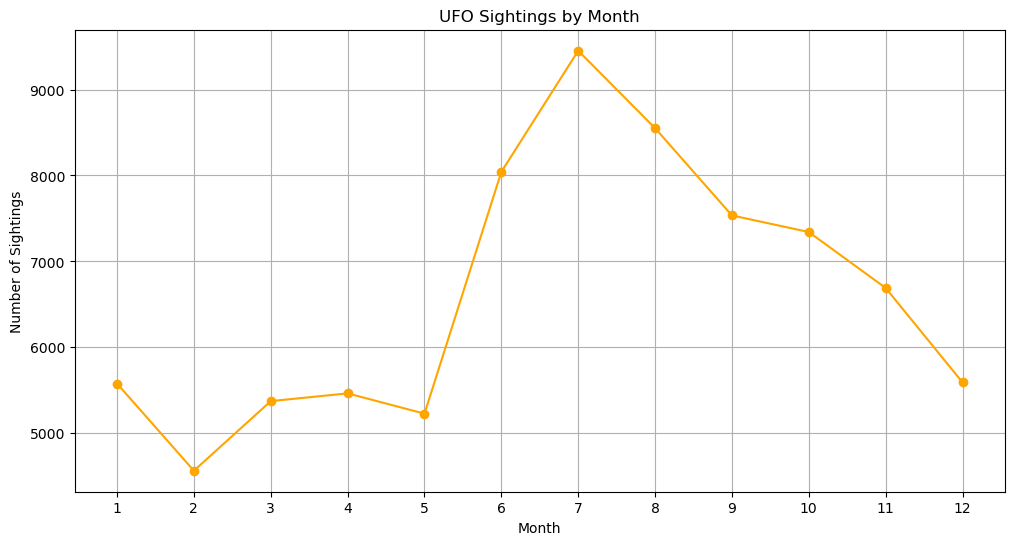

In [29]:


# Plotting the monthly sightings
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='line', marker='o', color='orange')
plt.title('UFO Sightings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sightings')
plt.xticks(range(1, 13))
plt.grid()
plt.show()

July and August show the highest frequency of UFO sightings, with summer months generally leading, while sightings taper off during the winter. This suggests a potential seasonal pattern, possibly influenced by clearer skies or more outdoor activity.

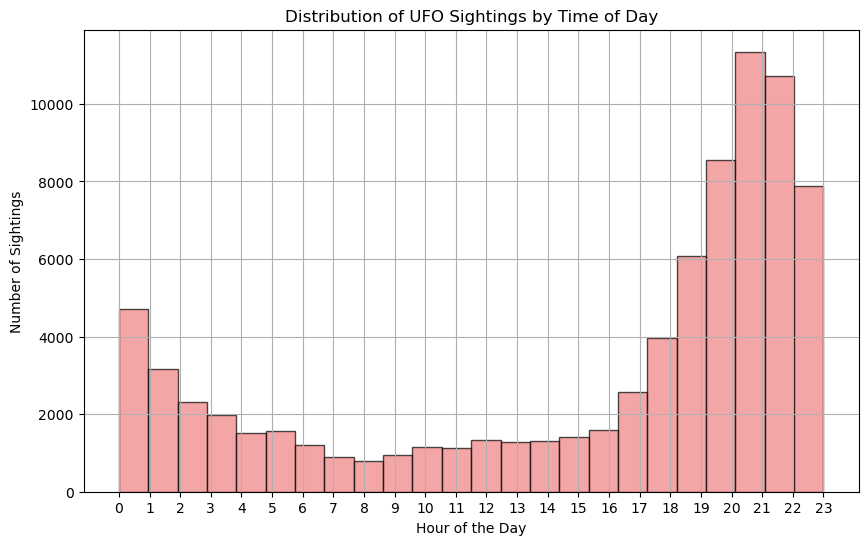

In [30]:
#Distribution of sightings by Hour (Time of Day)
plt.figure(figsize=(10, 6))
plt.hist(ufo_df['Hour'], bins=24, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Distribution of UFO Sightings by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Sightings')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

In [31]:
# Count sightings by season
season_counts = ufo_df['Season'].value_counts()
print(season_counts)


Season
Summer    26045
Autumn    21568
Spring    16066
Winter    15734
Name: count, dtype: int64


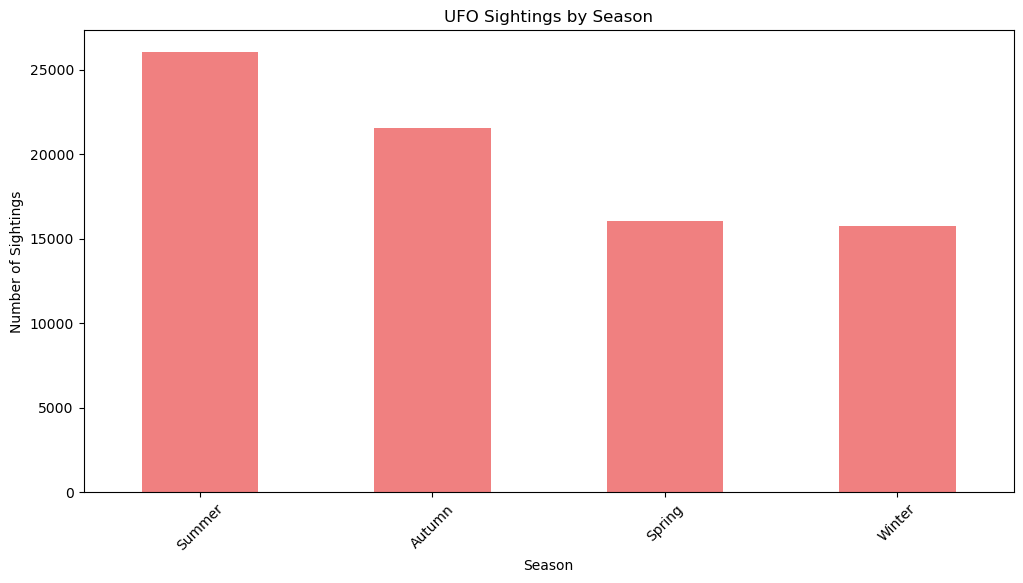

In [32]:


# Plotting sightings by season
plt.figure(figsize=(12, 6))
season_counts.plot(kind='bar', color='lightcoral')
plt.title('UFO Sightings by Season')
plt.xlabel('Season')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.show()

Summer is the peak season for UFO sightings, followed by autumn. The higher number of sightings during warmer months could be attributed to longer daylight hours and more outdoor visibility opportunities.

### Patterns in UFO Shapes and Descriptions ###


We explore the most frequently reported UFO shapes and lengths of encounters using the UFO_shape and length_of_encounter_seconds columns.

In [33]:
#Frequency of different UFO shapes
ufo_shape_counts = ufo_df['UFO_shape'].value_counts().head(10)  # Top 10 most reported shapes
print(ufo_shape_counts)

UFO_shape
light        16394
triangle      7798
circular      7515
unknown       7399
fireball      6154
other         5582
sphere        5336
disk          5138
oval          3689
formation     2428
Name: count, dtype: int64


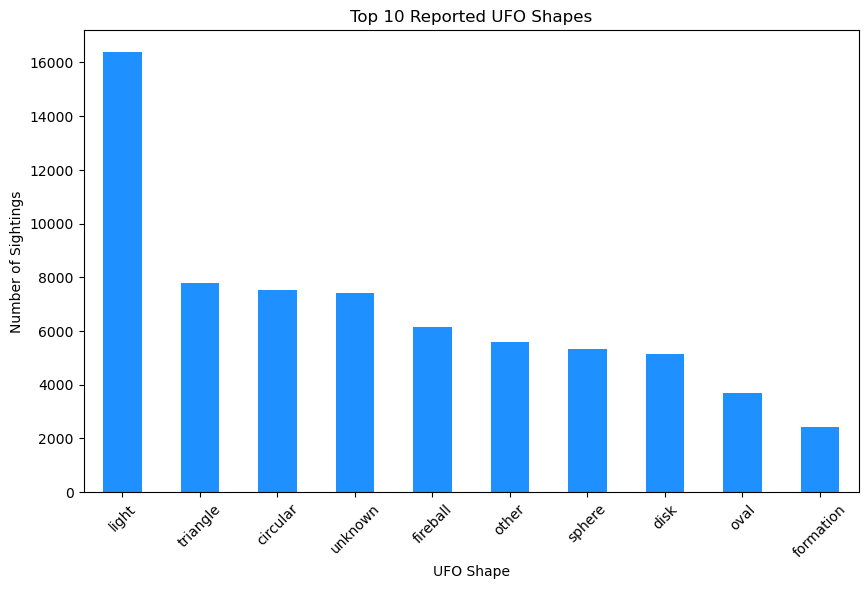

In [34]:

# Plot the frequency of UFO shapes
plt.figure(figsize=(10, 6))
ufo_shape_counts.plot(kind='bar', color='dodgerblue')
plt.title('Top 10 Reported UFO Shapes')
plt.xlabel('UFO Shape')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.show()

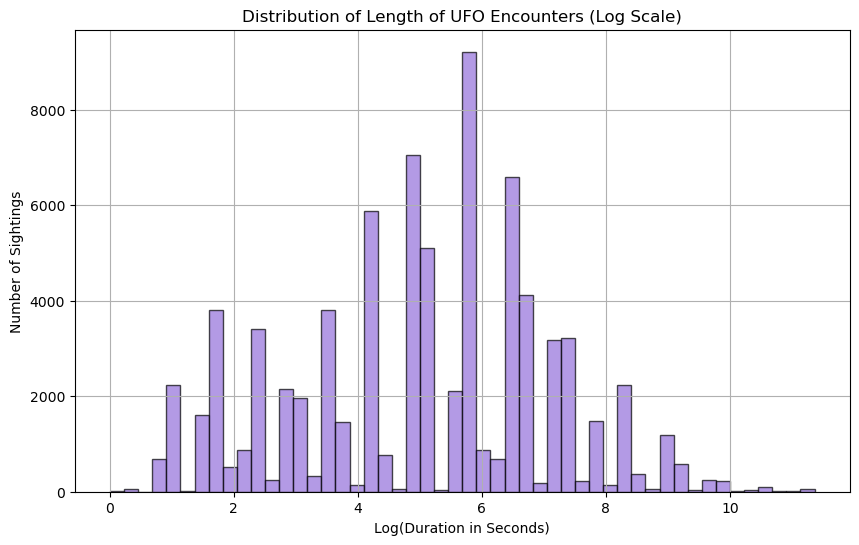

In [35]:
#Distribution of length of encounter (log-transformed for better visualization)
plt.figure(figsize=(10, 6))
plt.hist(np.log1p(ufo_df['length_of_encounter_seconds']), bins=50, color='mediumpurple', edgecolor='black', alpha=0.7)
plt.title('Distribution of Length of UFO Encounters (Log Scale)')
plt.xlabel('Log(Duration in Seconds)')
plt.ylabel('Number of Sightings')
plt.grid(True)
plt.show()

Showing that most sightings are relatively short, with a few outliers representing longer encounters.

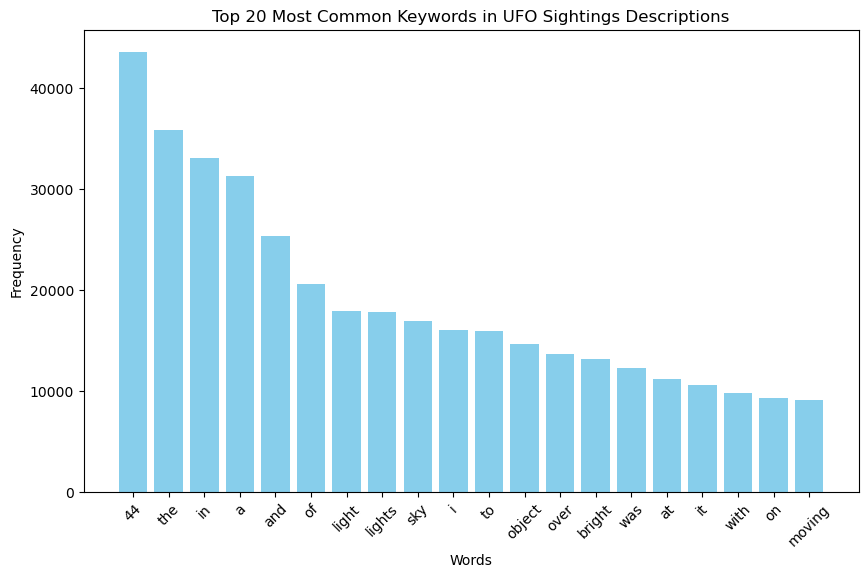

In [36]:
from collections import Counter
import re

# Redefine and extract all words from the 'Description' column
all_descriptions = ' '.join(ufo_df['Description'].astype(str))

# Basic text cleaning: removing special characters and splitting into words
words = re.findall(r'\b\w+\b', all_descriptions.lower())

# Count the frequency of each word
word_counts = Counter(words)

# Get the top 20 most common words
word_counts_most_common = word_counts.most_common(20)
words, counts = zip(*word_counts_most_common)

# Plotting a bar chart for the top 20 most frequent words
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 20 Most Common Keywords in UFO Sightings Descriptions')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Extracted common keywords in UFO sighting descriptions, offering insights into popular themes and narratives.

### Correlation Between Timing & Sightings 

We explore the relationship between timing variables (Season, Month, Hour) and the length of encounters to identify any correlations.

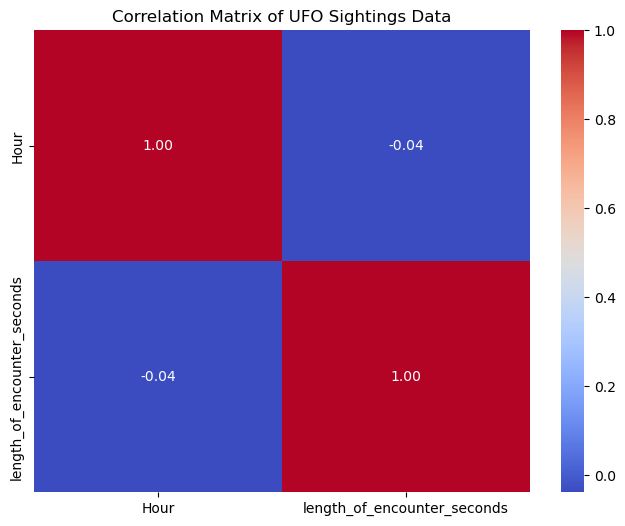

In [37]:
# Correlation Analysis using a heatmap
# Selecting numeric columns relevant for correlation analysis
numeric_columns = ['Hour', 'length_of_encounter_seconds']

# Calculate the correlation matrix
correlation_matrix = ufo_df[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of UFO Sightings Data')
plt.show()

It highlights that there is little to no strong correlation between these variables.

### Geographic Distribution (Might be better with tableau)

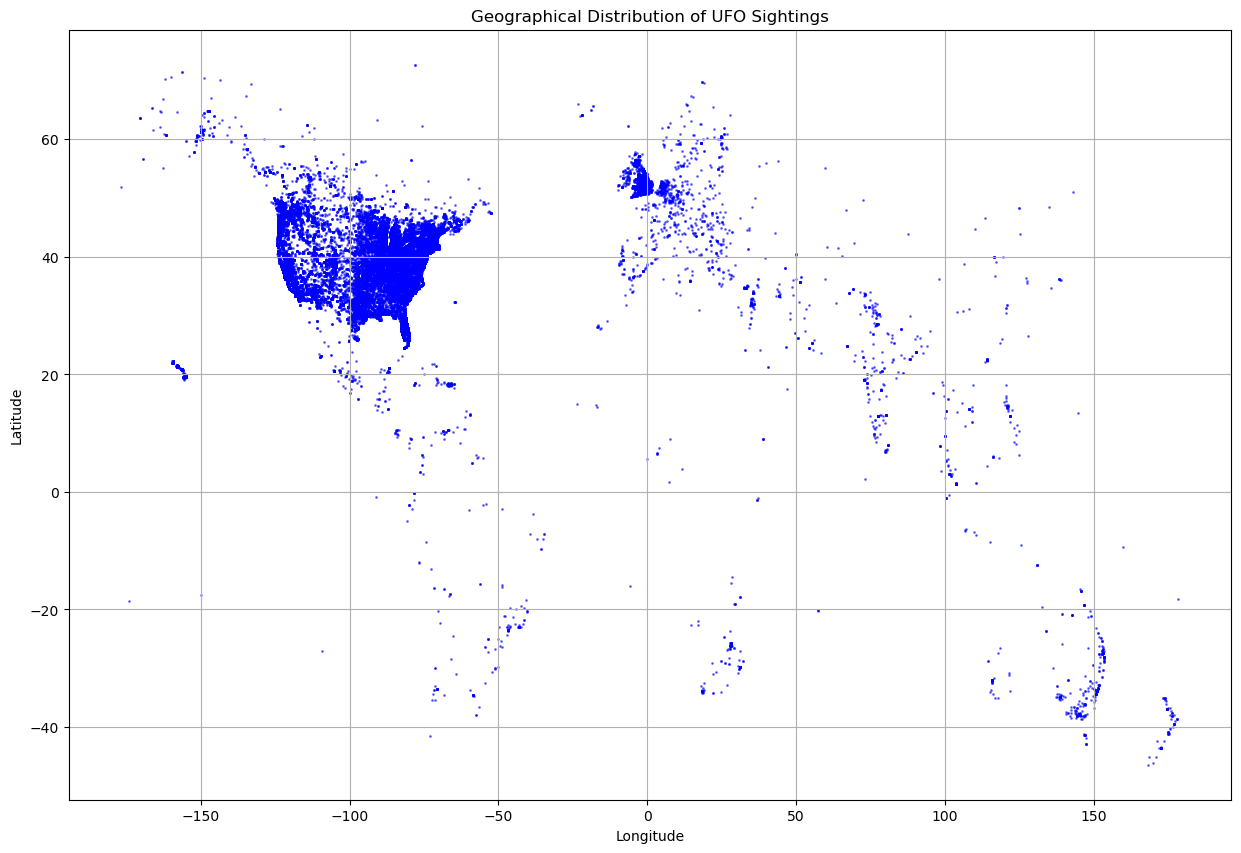

In [38]:
# Plotting a scatter plot of UFO sightings using latitude and longitude
plt.figure(figsize=(15, 10))
plt.scatter(ufo_df['longitude'], ufo_df['latitude'], s=1, alpha=0.5, color='blue')
plt.title('Geographical Distribution of UFO Sightings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

The scatter plot displays the geographical distribution of UFO sightings based on latitude and longitude, highlighting regions with higher concentrations of sightings.

### **Conclusions**

- **UFO Sightings by Region and Time**:  
  The United States, especially California, leads in UFO sightings by a significant margin. Sightings peak during the summer months, particularly in July and August, and are more frequent in coastal and densely populated areas. The trend over the years shows a rise in sightings after 2010, with a peak in 2012, followed by a decline.

- **Patterns in UFO Shapes and Descriptions**:  
  The most commonly reported UFO shape is "light," followed by "triangle" and "circular" forms. The descriptions often include terms like "light," "moving," and "sky." The distribution of the length of encounters suggests most sightings are brief, with a median duration of around 180 seconds.

- **Correlation Between Timing and Sightings**:  
  There is no strong correlation between the time of day (hour) and the duration of encounters, with a weak negative correlation (-0.04). This suggests that while there may be certain times with more sightings, the length of these encounters does not significantly vary based on the time.



### **Additional Insights & Recommendations**


- **High Sightings in Certain Regions and at Specific Times of Year**:  
  For Tourism Agencies: Create "UFO Tourism Trails" in these high-sighting regions (e.g., California, Washington) with seasonal promotions for autumn and summer. Collaborate with local businesses to offer guided tours during the peak times in the evening (8 p.m. - midnight), focusing on open-sky locations for better visibility.

  For Travel Companies: Design travel packages that include nighttime skywatching experiences in the top sighting regions during the peak months. Add complementary activities like camping, storytelling around sightings, and expert-led UFO talks to enhance the experience.

- **Commonly Reported Shapes and Their Impact on Tourist Experience**:  
  For Local Communities: Develop attractions themed around these popular shapes. For example, in regions with a high frequency of "Light" sightings, organize "Light Festivals" featuring sky illuminations, light installations, and educational activities on UFO phenomena.

  For Travel Companies: Create different packages based on shape experiences. "Quick Flash Skywatching" could focus on shorter sightings like "lights" or "circles" with sky-gazing and light shows, while "Deep Sky Mystery Tours" could emphasize longer sightings like "triangles" and "discs," including time for discussions about the sighting descriptions and more in-depth nighttime exploration.

- **Regions with Longer Average Encounter Durations as Key Destinations**:  
  For Tourism Agencies & Local Governments: Identify and promote these regions (e.g., states within the U.S. or countries like the UK) as top destinations for in-depth UFO experiences. Create "Extended Sighting Zones" where tourists can experience longer skywatching periods, complete with telescopes, night-vision equipment, and comfortable seating areas.

  For Marketing Teams: Use the unique appeal of these long-duration encounters in advertising campaigns: "Experience the Longest-Lasting UFO Sightings." Highlight local testimonials and stories to enhance the sense of mystery and anticipation for tourists.

- **Emotional Tone of Sightings and Its Connection to Tourist Experience**:  
  For Travel Companies: Design tours that cater to different emotional experiences: "Wonder in the Sky" Tours: Focus on long, positive encounters, offering relaxing, awe-inspiring experiences with ambient music, guided sky-gazing, and educational elements.

  "Thrills and Chills Night" Experiences: Leverage sightings described as "scary" or "strange" to create thrill-based tours, including night hikes, scary storytelling, and "mystery" themes to keep tourists on edge.

  For Tour Guides & Educators: Craft narratives around the emotional content of sightings. For sightings with positive sentiments, build a hopeful, awe-inspired story. For sightings with negative sentiment, create suspenseful, thrilling narratives to heighten the tourist experience.




### **Overall Strategic Enhancements**

- Target Key Regions & Timing: Focus on the U.S., especially states like California and Texas, and high-interest regions in the UK, during autumn and summer. Design experiences that are easy to access during peak evening hours.

- Tailor Tourism Packages by Sighting Type: Differentiate packages based on sighting characteristics. Quick encounters can offer "short, bright excitement," while longer sightings can provide in-depth experiences, immersive storytelling, and exploration.

- Highlight Emotional & Unique Experiences: Use sentiment analysis to design tours that connect emotionally with tourists. Play up either the wonder and excitement or the suspense and fear to craft unforgettable UFO-themed adventures.


### **Next Steps**

- **Deeper Analysis of Shape and Duration**:  
  Further analysis could explore whether specific shapes, such as "triangle" or "light," correlate with longer or shorter sighting durations, which may provide more insight into the nature of these sightings.

- **Predictive Modeling for Sightings**:  
  Building a predictive model that uses variables like time, season, region, and shape to predict future UFO sightings could aid governmental or research bodies in anticipating and preparing for possible events.

- **Anomaly Detection for False Positives**:  
  Applying anomaly detection techniques to the dataset could help identify potential "false positives" in the reports, distinguishing between legitimate sightings and potential misinterpretations.

- **Targeted Communication Strategies**:  
  Developing communication strategies based on the most common shapes and descriptions could enhance public awareness and provide clearer guidelines for reporting future sightings. This would improve data quality for researchers and policy-makers.

